**Exploration of Global Terrorism Database**

Get data from https://www.kaggle.com/START-UMD/gtd:

In [1]:
import kaggle
import os.path

try:
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('START-UMD/gtd', path='./data/', unzip=True)

    if os.path.isfile("data/globalterrorismdb_0718dist.csv"):
        print("Dataset loaded successfully.")
except:
    print("Something went wrong, perhaps you don't have access to kaggle.")

Dataset loaded successfully.


Load data from downloaded .csv file:

In [2]:
import pandas

dataset = pandas.read_csv("data/globalterrorismdb_0718dist.csv", encoding='latin-1', low_memory=False)


Remove columns missing more than 50% of data:

In [3]:
missing_data = dict()
for column in dataset.columns:
     missing_data[column] = 100 * sum([1 if item == True else 0 for item in dataset[column].isnull()]) / dataset[column].size

dataset = dataset[[column for column in dataset.columns if missing_data[column] < 50]]


Plot how terrorism rate changed over the years:

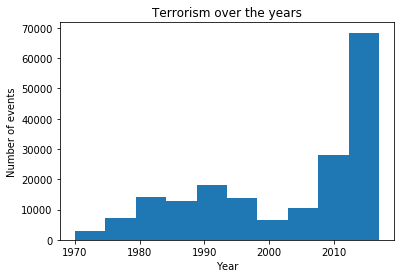

In [22]:
import matplotlib.axes
import matplotlib.pyplot

figure = matplotlib.pyplot.figure()
plot = figure.add_subplot(111)
plot.set_xlabel("Year")
plot.set_ylabel("Number of events")
plot.set_title("Terrorism over the years")
_ = plot.hist(dataset["iyear"])